In [1]:
# this notebook is to utilised fastai api to train a model on a dataset to classify breastcancer cases
from fastai.vision.all import *

In [2]:
# get data
data_dir = '/media/victoru/B612CEC512CE8A37/ai50/pytorch_test/data/breatcancer_data/archive'
fnames = get_image_files(data_dir)

# define label function to get the label from the file parent directory
def label_func(x): return x.parent.name

#setting up device to run on cuda
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# define hyperparameters
batch_size = 100
num_epochs = 4
validation_split = 0.2
seed = 42
size = 50

In [4]:
# create dataloader object
dataloader = ImageDataLoaders.from_folder(path=data_dir, fnames=fnames,label_func=label_func, valid_pct = validation_split, seed=seed, bs=batch_size, device=device, item_tfms=Resize(size))

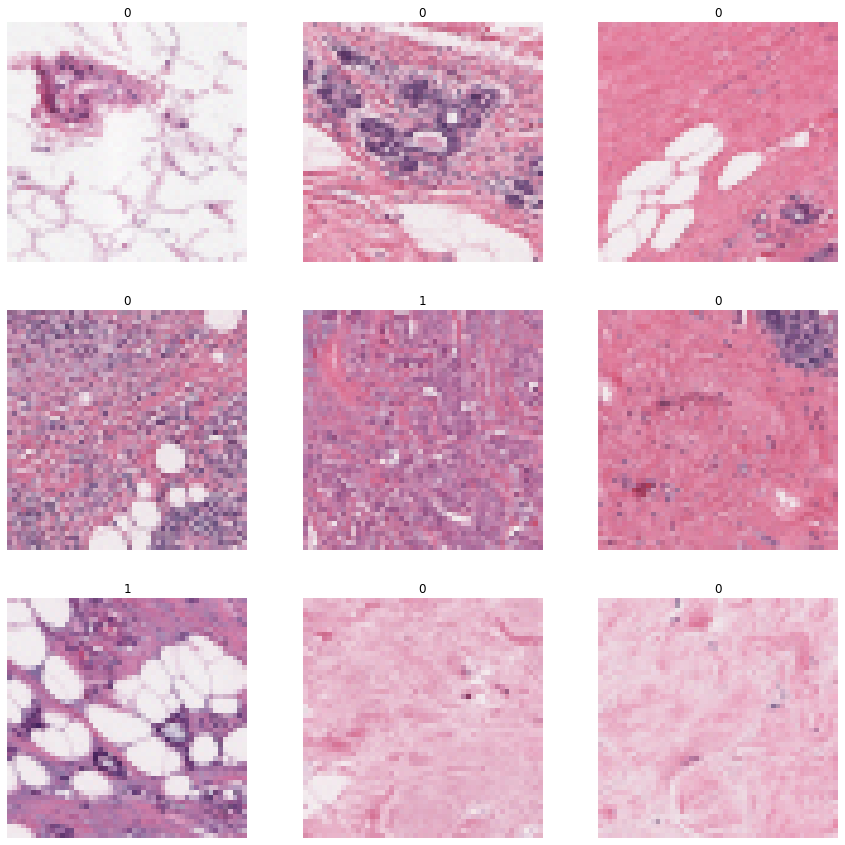

In [5]:
# check data
dataloader.show_batch(max_n=9, figsize=(15,15))

In [6]:
# define pre-trained model
learn = cnn_learner(dataloader, models.resnet34, pretrained=True, metrics=error_rate).to_fp16()

In [7]:
# train model
learn.fine_tune(num_epochs)
learn.save('stage_1')

epoch,train_loss,valid_loss,error_rate,time
0,0.335570,0.324183,0.135288,41:25


epoch,train_loss,valid_loss,error_rate,time
0,0.280065,0.273113,0.113758,02:03
1,0.239457,0.250750,0.104965,02:02
2,0.177405,0.268156,0.106533,01:59
3,0.090340,0.365513,0.109506,02:03


Path('/media/victoru/B612CEC512CE8A37/ai50/pytorch_test/data/breatcancer_data/archive/models/stage_1.pth')

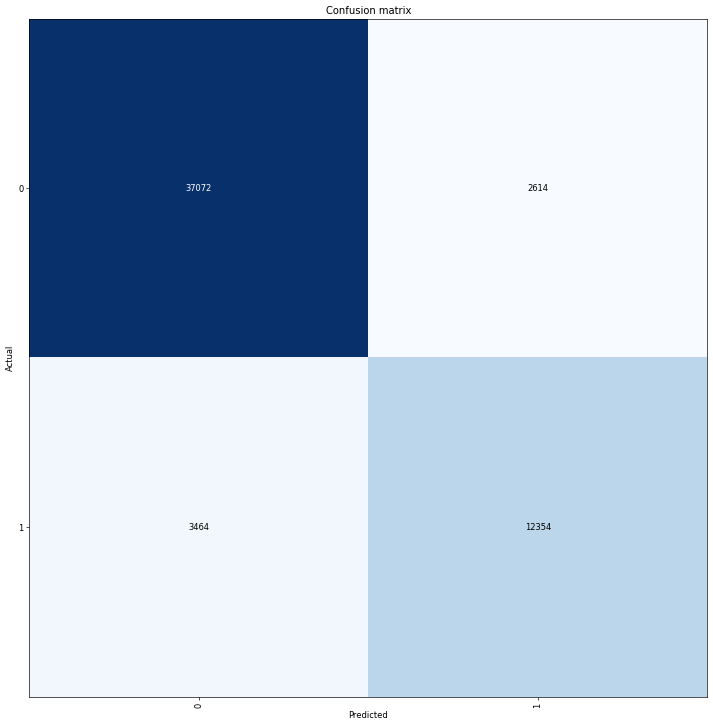

In [8]:
# checking out result
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)